In [119]:
from keras.layers import Dense , Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.datasets import mnist

from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [120]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [121]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


In [122]:
X_train[0].shape

(28, 28)

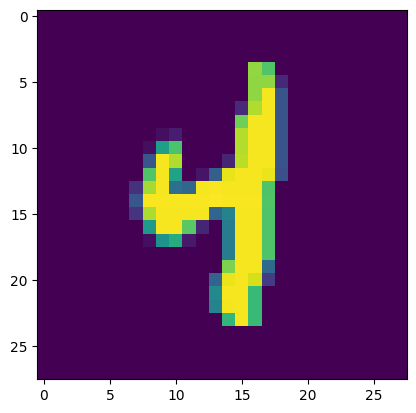

In [123]:
plt.imshow(X_train[2334])

In [124]:
y_train[2334]

4

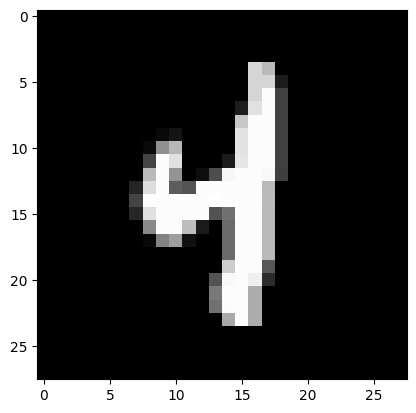

In [125]:
plt.imshow(X_train[2334], cmap = 'gray')

In [126]:
# Reshaping the data 
# CNN expect input image is to be in 3D format
# Height, width and channel

In [127]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28,28, 1)

In [128]:
# to make sure when scaling there is no integer in the data

In [129]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [130]:
# scaling the image

In [131]:
X_train /= 255.0
X_test /= 255.0

In [132]:
# processing Y

In [133]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [134]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [135]:
y_train = to_categorical(y_train)

In [136]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [137]:
y_test = to_categorical(y_test)

In [138]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [139]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (60000, 28, 28, 1)
y_train (60000, 10)
X_test (10000, 28, 28, 1)
y_test (10000, 10)


In [140]:
# model building

In [145]:
cnn = Sequential()

# input shape
# Convolution layer1

cnn.add(Conv2D(32, (5,5), input_shape = (28,28,1), padding = 'same', activation = 'relu'))

cnn.add(MaxPool2D(2,2))      

# Convolution layer2

cnn.add(Conv2D(16, (5,5), padding = 'same', activation = 'relu'))

cnn.add(MaxPool2D(2,2))   

# Flatten

cnn.add(Flatten())

# ANN
cnn.add(Dense(1024, activation = 'relu'))

# Output
cnn.add(Dense(10, activation = 'softmax'))

In [146]:
# Compile the model

In [153]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [154]:
 # model fitting

In [155]:
mdl_history = cnn.fit(X_train, y_train, epochs = 15, validation_data = (X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1112 - accuracy: 0.9661 - val_loss: 0.0433 - val_accuracy: 0.9862
Epoch 2/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 3/15
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0333 - val_accuracy: 0.9904
Epoch 4/15
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0269 - val_accuracy: 0.9903
Epoch 5/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0250 - val_accuracy: 0.9919
Epoch 6/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0307 - val_accuracy: 0.9917
Epoch 7/15
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0318 -

In [156]:
mdl_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

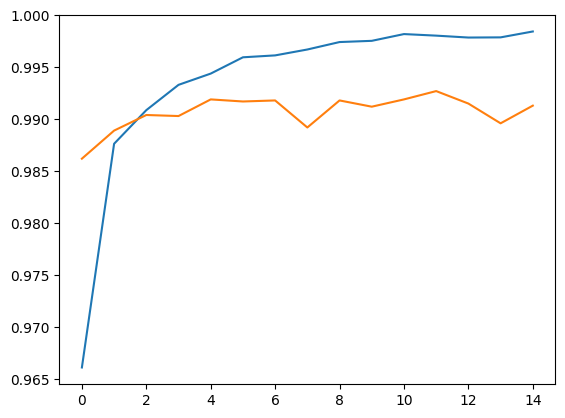

In [160]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])

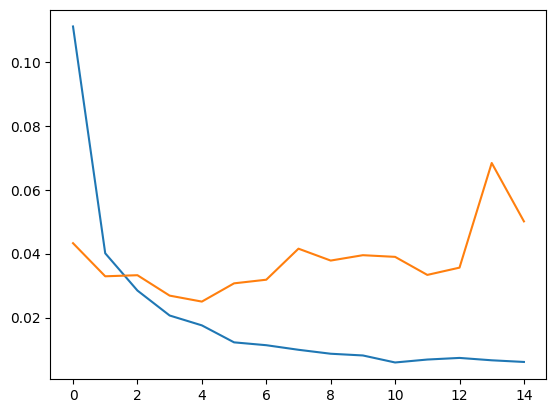

In [161]:
plt.plot(mdl_history.history['loss'])
plt.plot(mdl_history.history['val_loss'])